In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import ndimage as ndi

In [9]:
PREDICT_DIR = r'D:\Hanun\Dataset\Segmentation Output\UNET_with_augmentation'
IMAGE_DIR = r'D:\Hanun\Dataset\Preprocessing Output\Image'
MASK_DIR = r'D:\Hanun\Dataset\Preprocessing Output\Mask'

In [79]:
#original = np.load(IMAGE_DIR+'/LIDC-IDRI-0018/0008_NI000_slice002.npy'

original = np.load(IMAGE_DIR+'/LIDC-IDRI-0045/0045_NI010_slice004.npy')
predict = np.load(PREDICT_DIR+'\\0045_PD010_slice004.npy')
answer = np.load(MASK_DIR+'/LIDC-IDRI-0045/0045_MA010_slice004.npy')

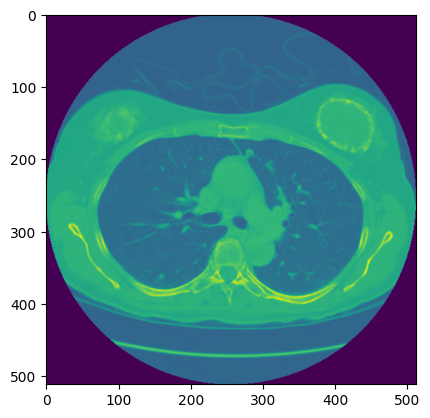

In [82]:
plt.imshow(original)

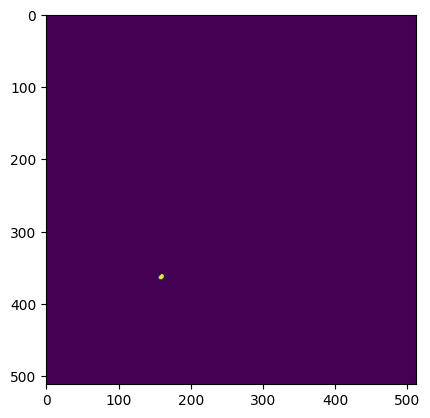

In [83]:
plt.imshow(predict)

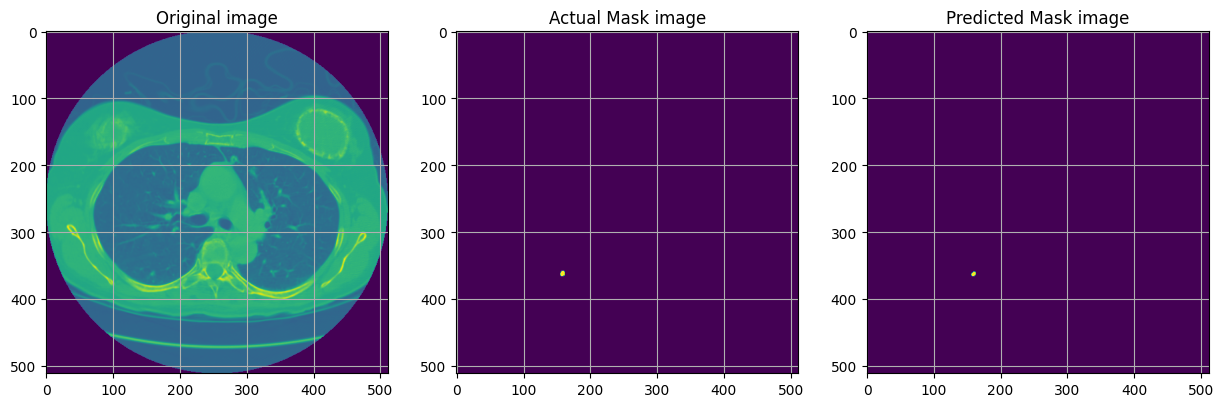

In [12]:
fig,ax = plt.subplots(1,3, figsize=(15,15))
ax[0].title.set_text('Original image')
ax[0].imshow(original)
ax[0].grid()
ax[1].title.set_text('Actual Mask image')
ax[1].imshow(answer)
ax[1].grid()
ax[2].title.set_text('Predicted Mask image')
ax[2].imshow(predict)
ax[2].grid()
plt.savefig("prediction_distance_comparison.png",dpi=300)
plt.show()

In [13]:
def view_img(MASK_DIR,PREDICT_DIR,IMAGE_DIR):
    
    for prediction in os.listdir(PREDICT_DIR)[30:60]:
        pid = 'LIDC-IDRI-'+prediction[:4]
        mask_id = prediction.replace('PD','MA')
        image_id = prediction.replace('PD','NI')
        
        original_img= np.load(IMAGE_DIR+'/'+pid+'/'+image_id)
        mask_img= np.load(MASK_DIR+'/'+pid+'/'+mask_id)
        predict_mask =np.load(PREDICT_DIR+'/'+prediction)

        fig,ax = plt.subplots(1,3, figsize=(15,15))
        print(pid,prediction)
        ax[0].title.set_text('Original image')
        ax[0].imshow(original_img)
        ax[0].grid()
        ax[1].title.set_text('Mask image')
        ax[1].imshow(mask_img)
        ax[1].grid()
        ax[2].title.set_text('Predicted Mask image')
        ax[2].imshow(predict_mask)
        ax[2].grid()
        plt.show()


In [14]:
pid_list = os.listdir(PREDICT_DIR)[:10]

LIDC-IDRI-0011 0011_PD009_slice001.npy


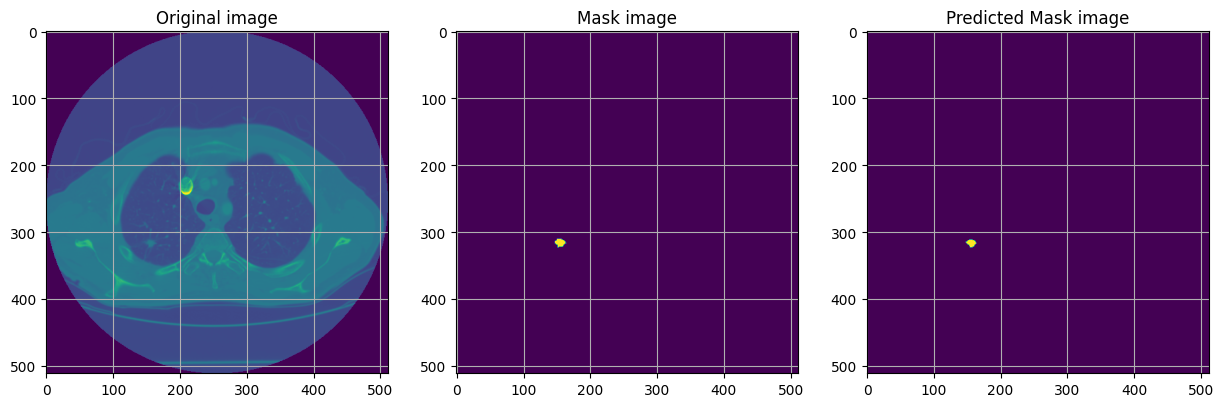

LIDC-IDRI-0011 0011_PD009_slice002.npy


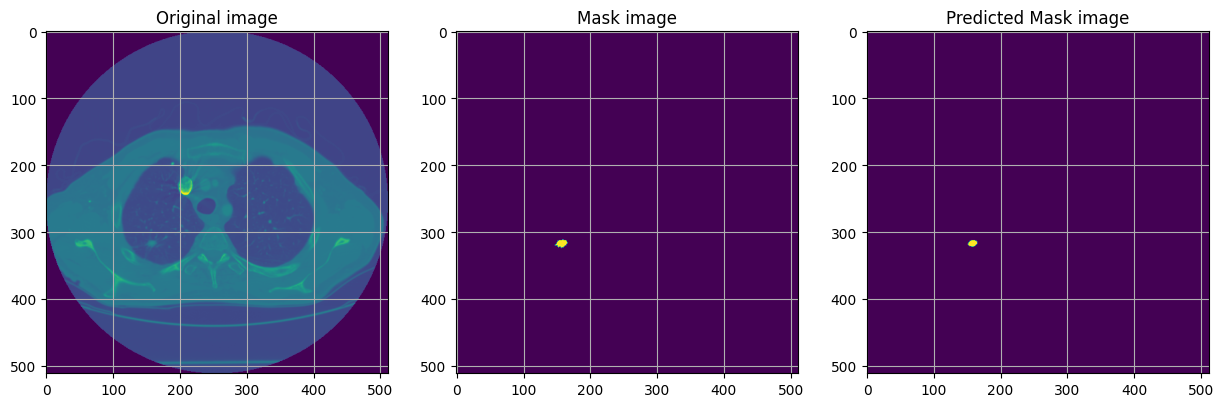

LIDC-IDRI-0011 0011_PD009_slice003.npy


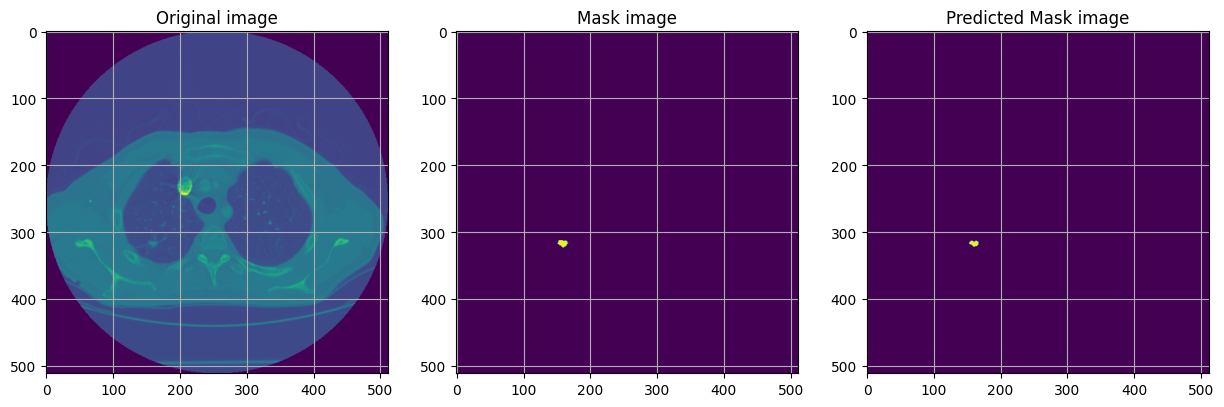

LIDC-IDRI-0011 0011_PD009_slice004.npy


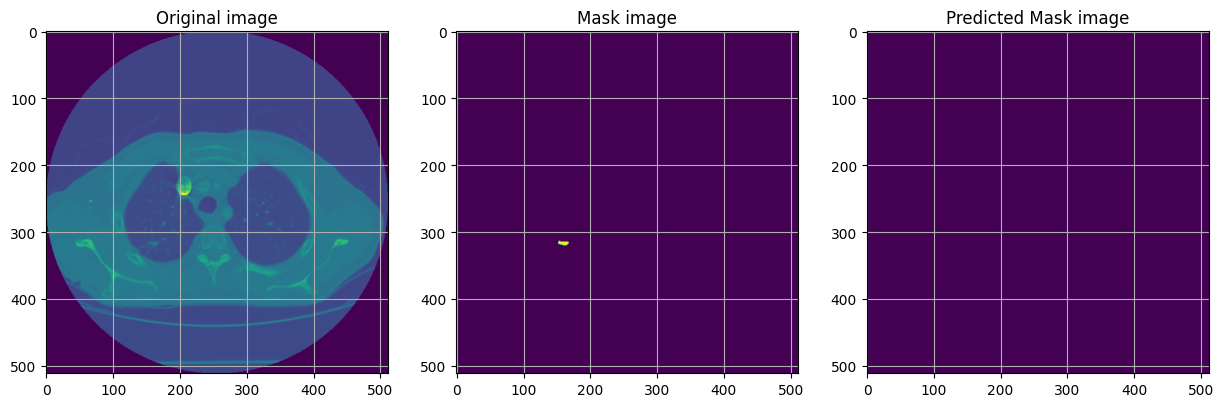

LIDC-IDRI-0011 0011_PD009_slice005.npy


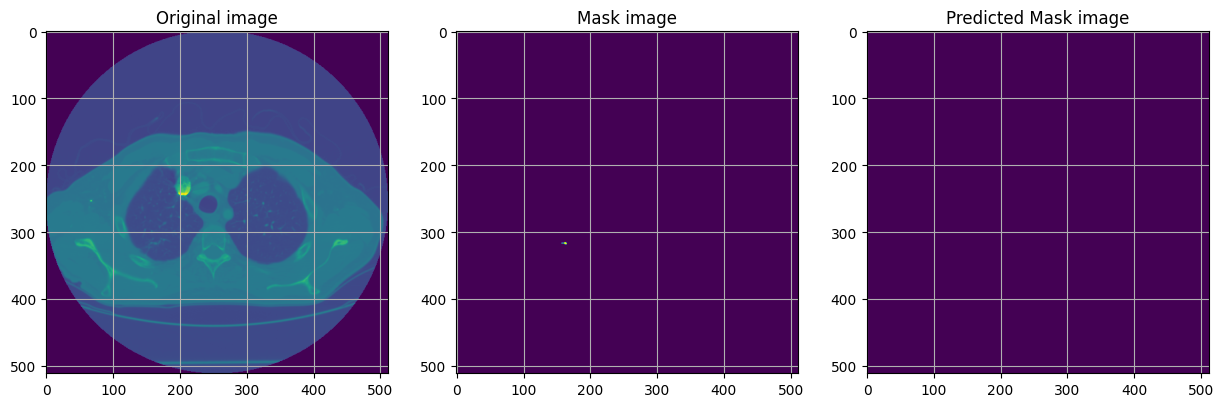

LIDC-IDRI-0014 0014_PD000_slice000.npy


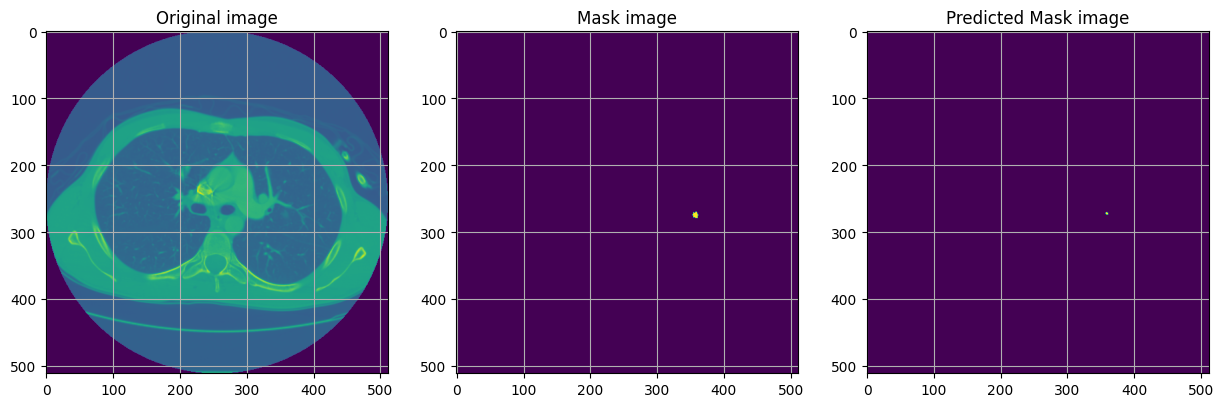

LIDC-IDRI-0014 0014_PD000_slice001.npy


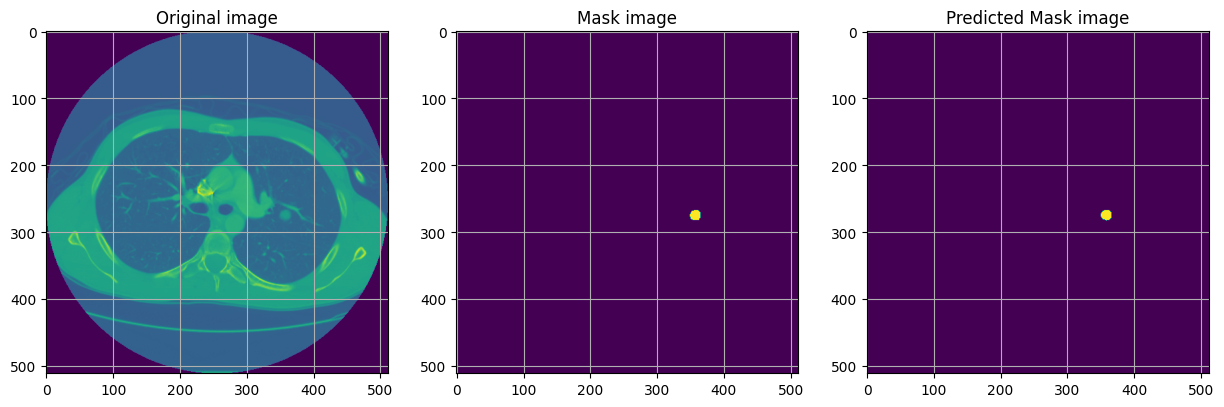

LIDC-IDRI-0014 0014_PD000_slice002.npy


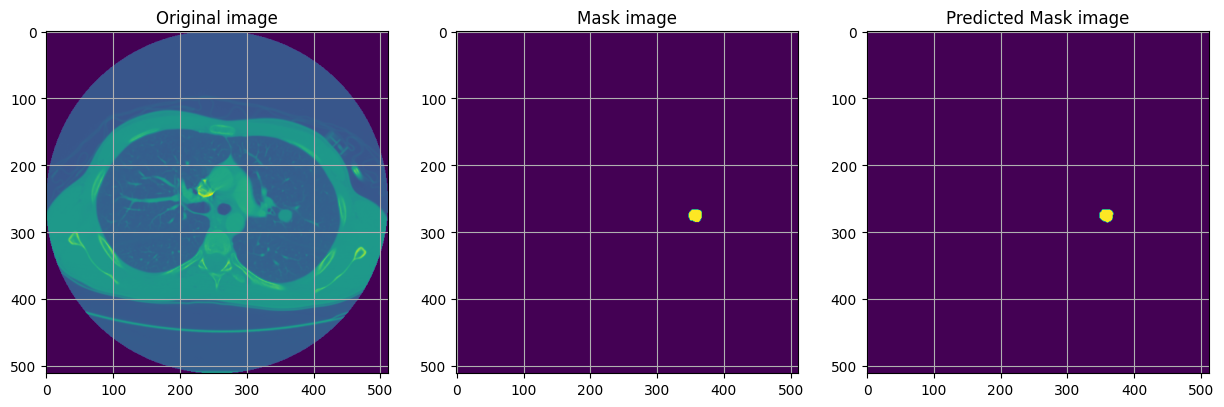

LIDC-IDRI-0014 0014_PD000_slice003.npy


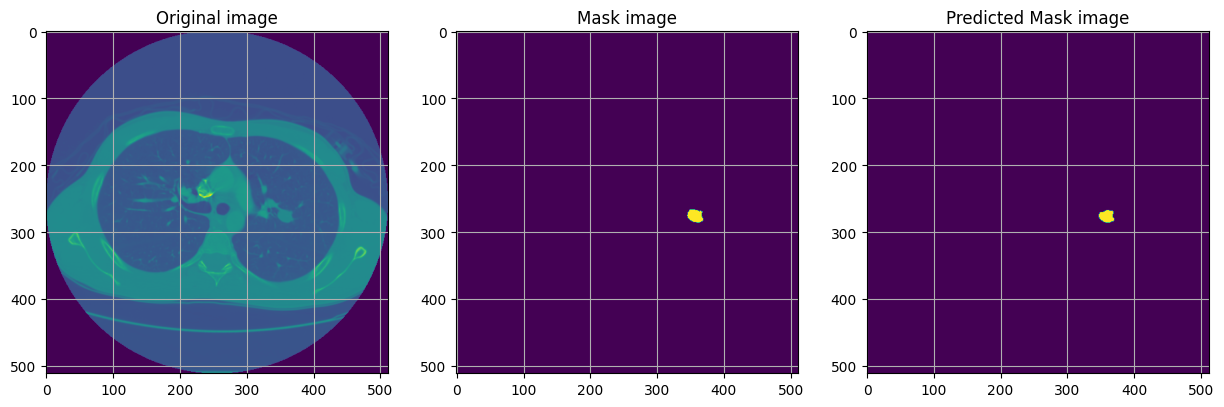

LIDC-IDRI-0014 0014_PD000_slice004.npy


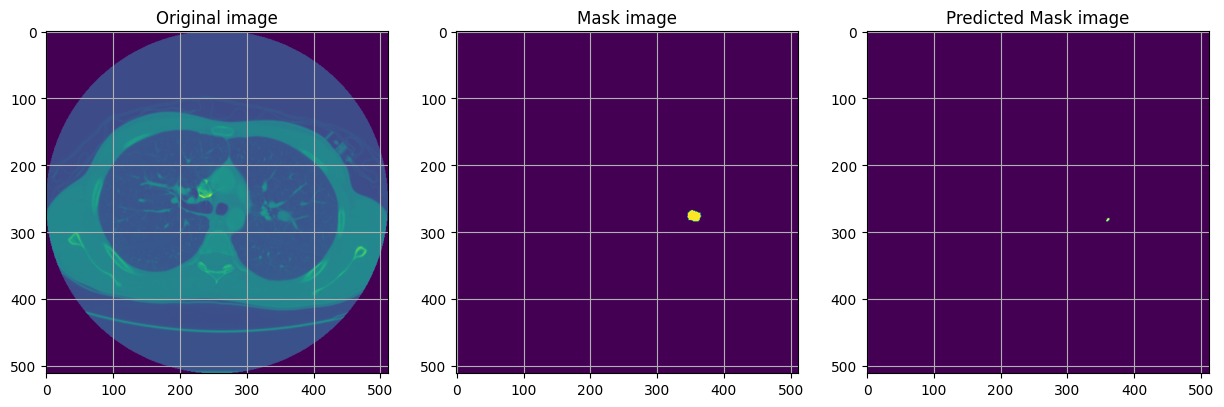

LIDC-IDRI-0014 0014_PD000_slice005.npy


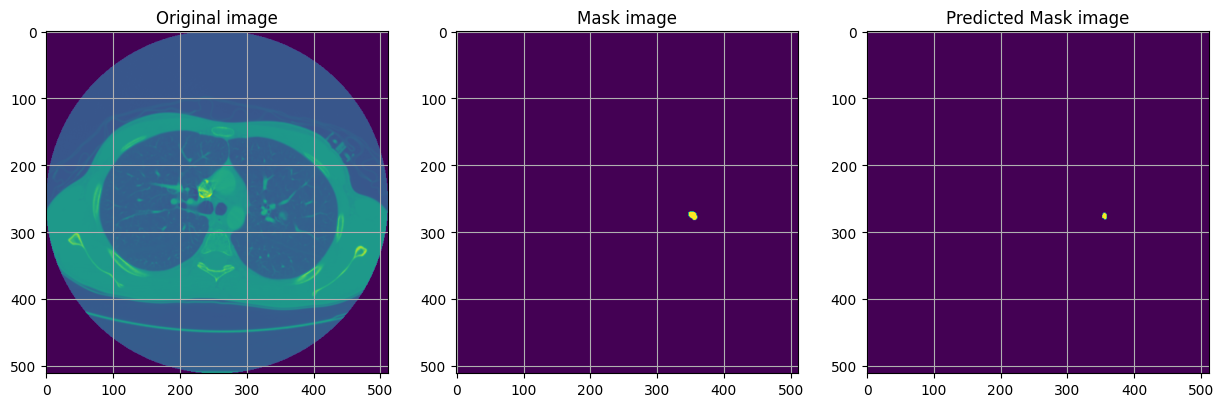

LIDC-IDRI-0020 0020_PD000_slice000.npy


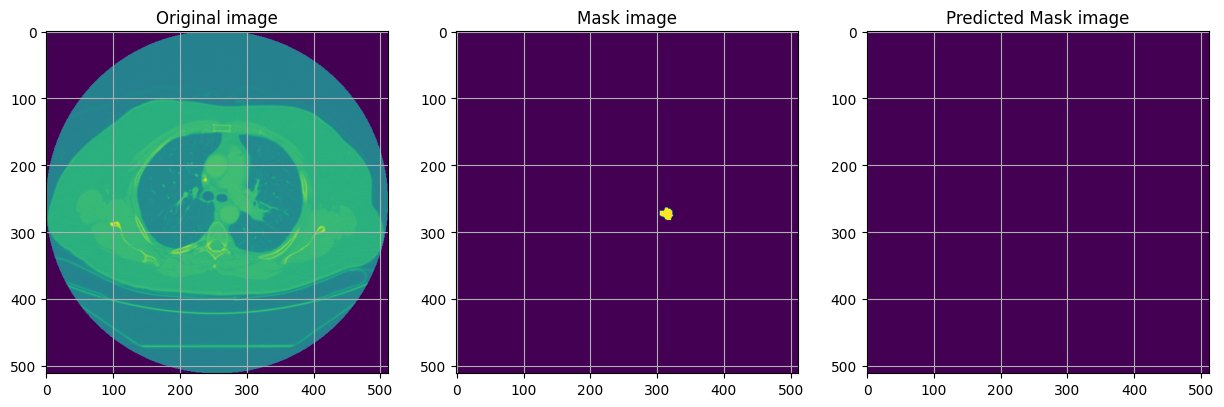

LIDC-IDRI-0020 0020_PD000_slice001.npy


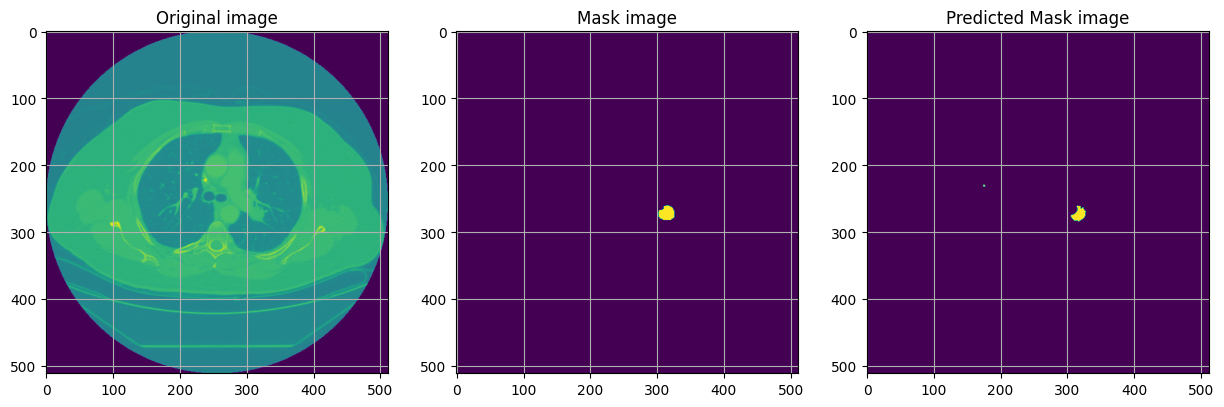

LIDC-IDRI-0020 0020_PD000_slice002.npy


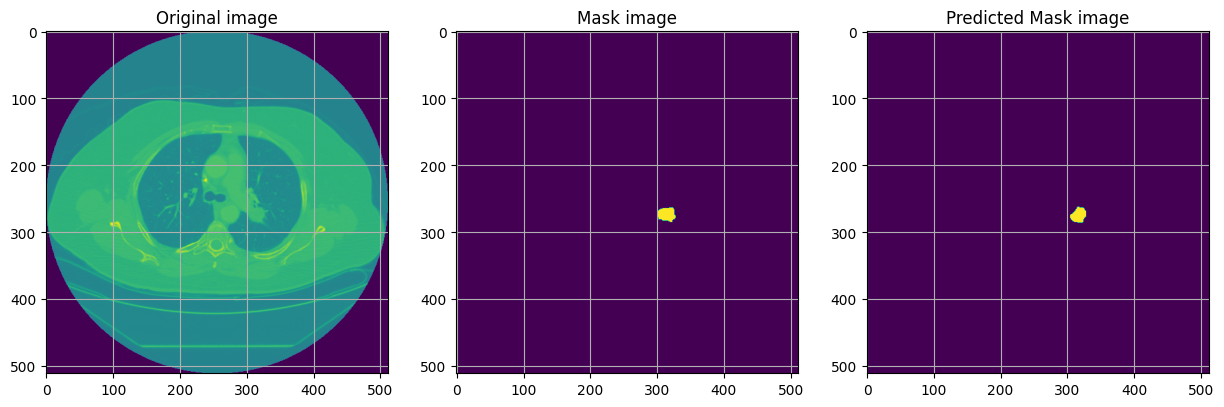

LIDC-IDRI-0020 0020_PD000_slice003.npy


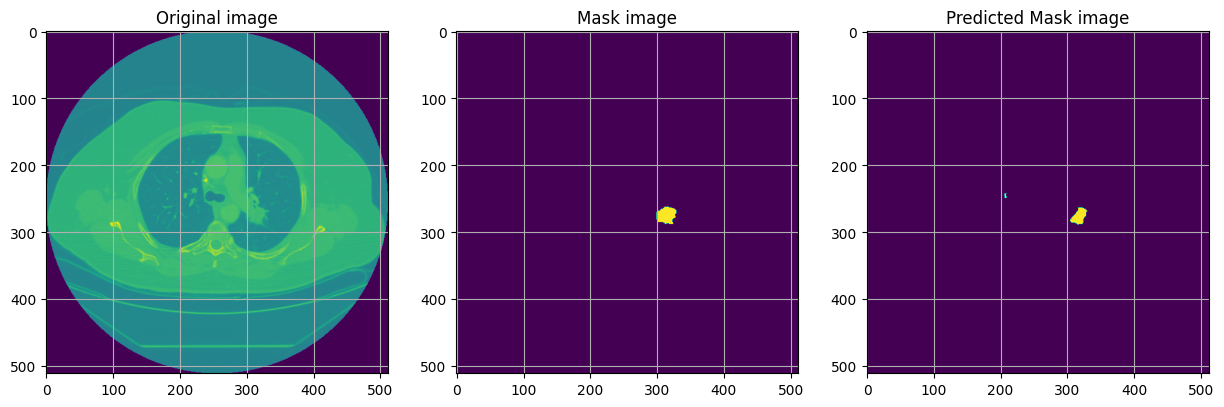

LIDC-IDRI-0020 0020_PD000_slice004.npy


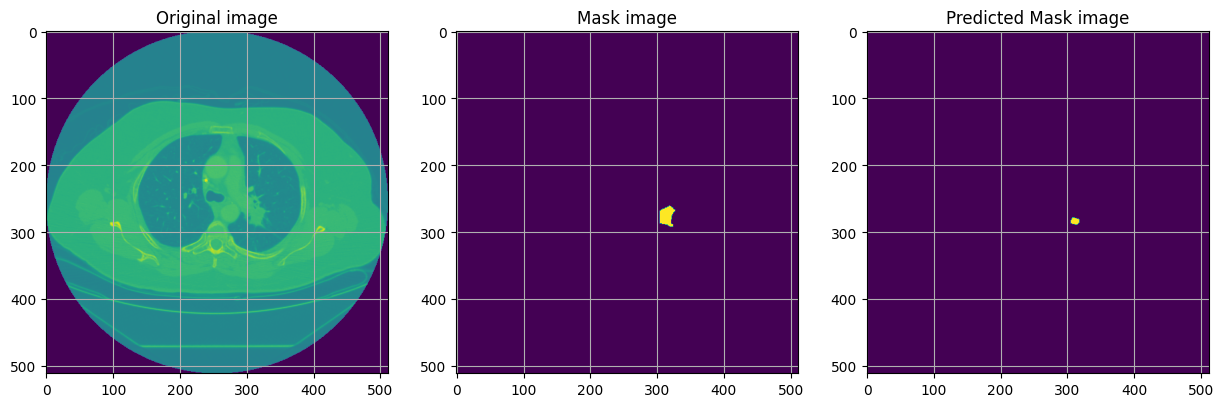

LIDC-IDRI-0020 0020_PD000_slice005.npy


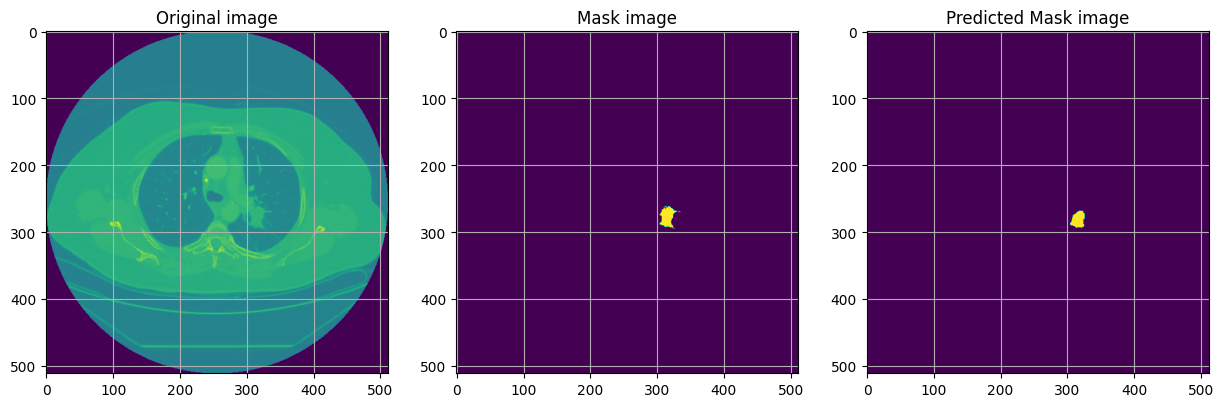

LIDC-IDRI-0020 0020_PD000_slice006.npy


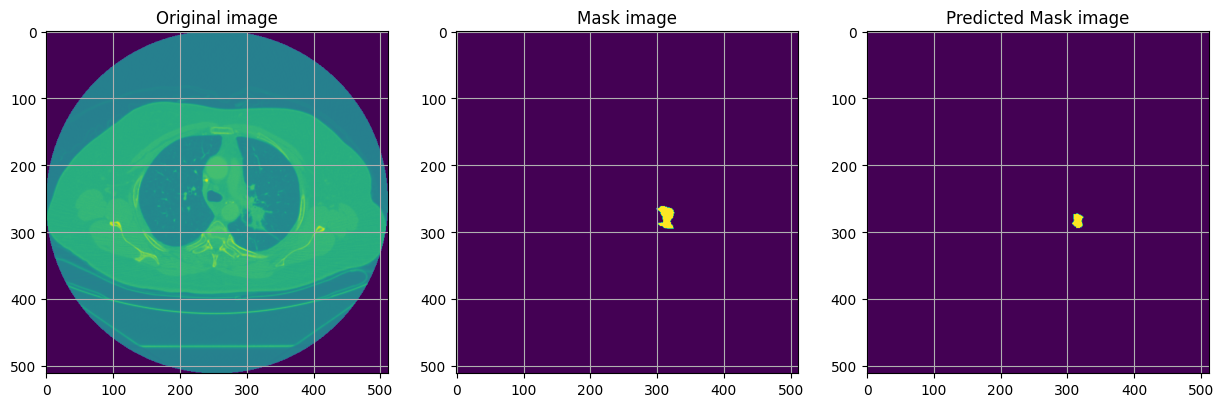

LIDC-IDRI-0020 0020_PD000_slice007.npy


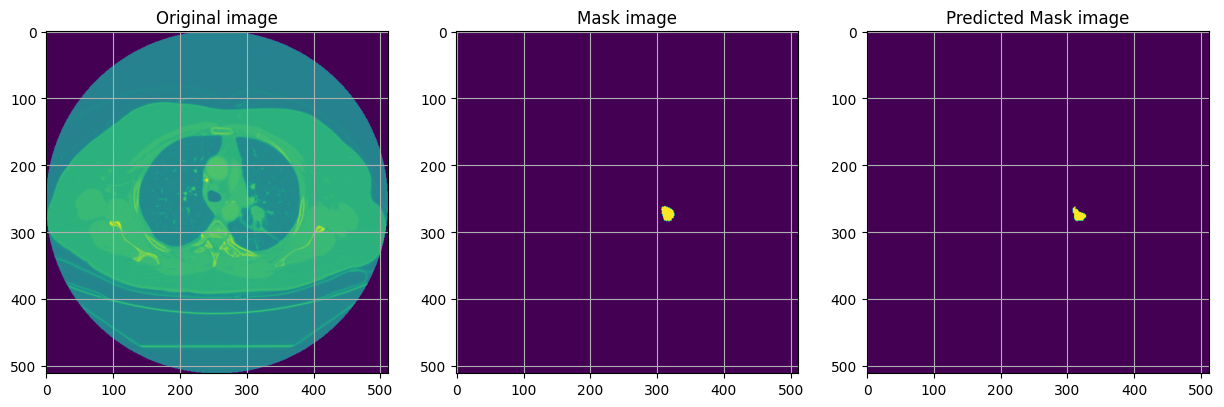

LIDC-IDRI-0020 0020_PD000_slice008.npy


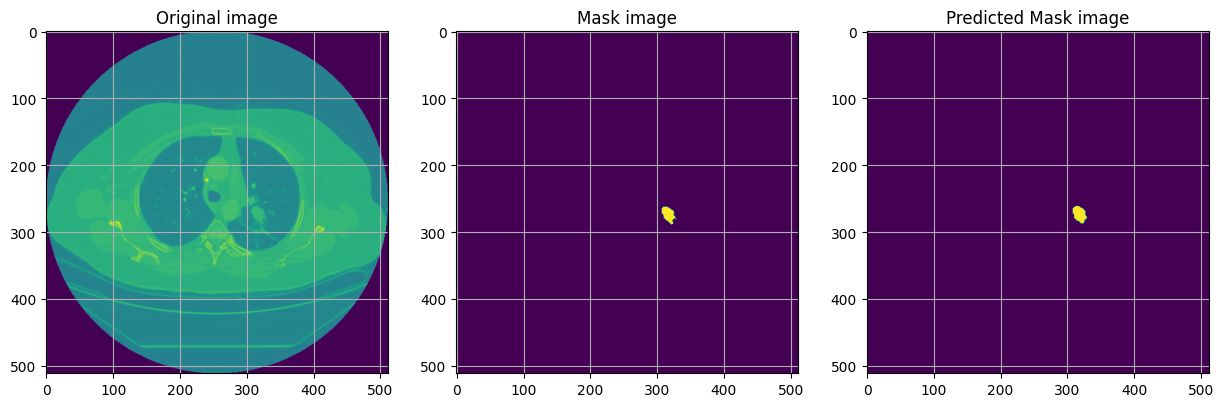

LIDC-IDRI-0020 0020_PD000_slice009.npy


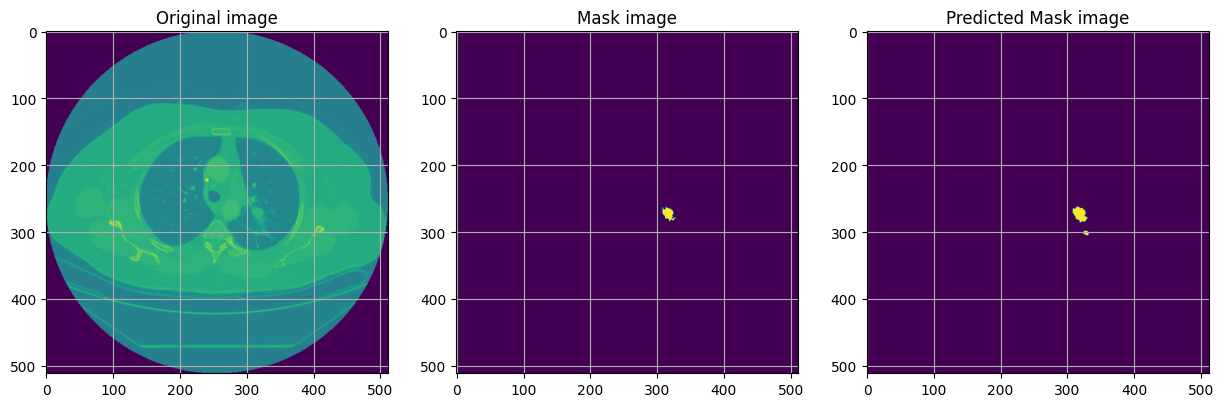

LIDC-IDRI-0020 0020_PD000_slice010.npy


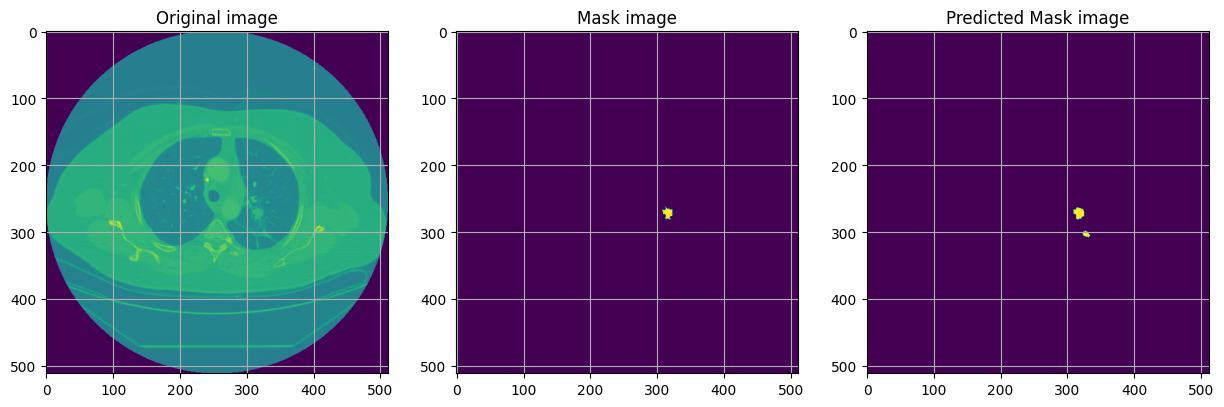

LIDC-IDRI-0020 0020_PD000_slice011.npy


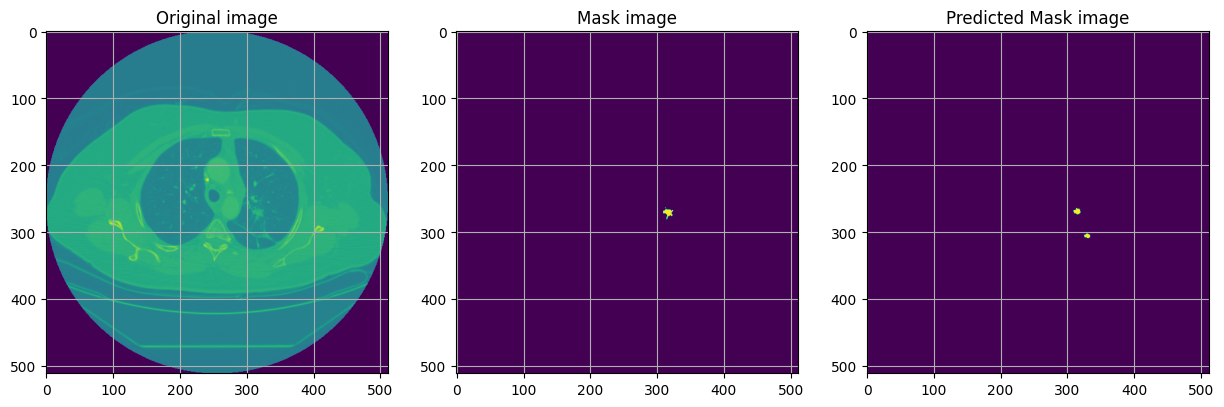

LIDC-IDRI-0020 0020_PD000_slice012.npy


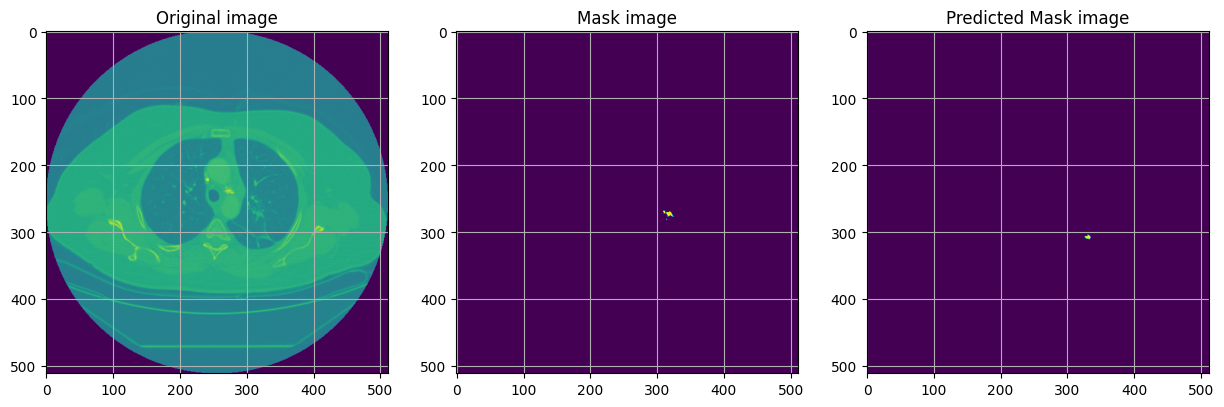

LIDC-IDRI-0020 0020_PD001_slice001.npy


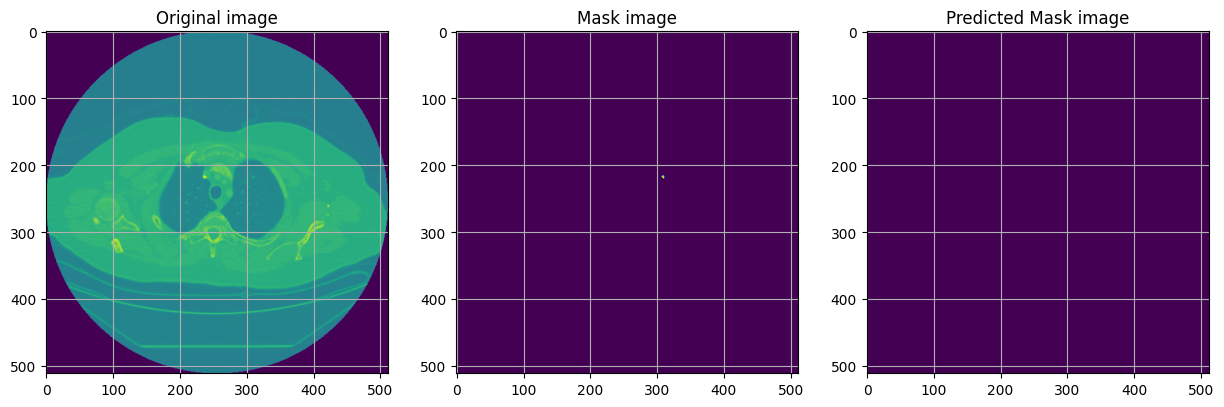

LIDC-IDRI-0020 0020_PD001_slice002.npy


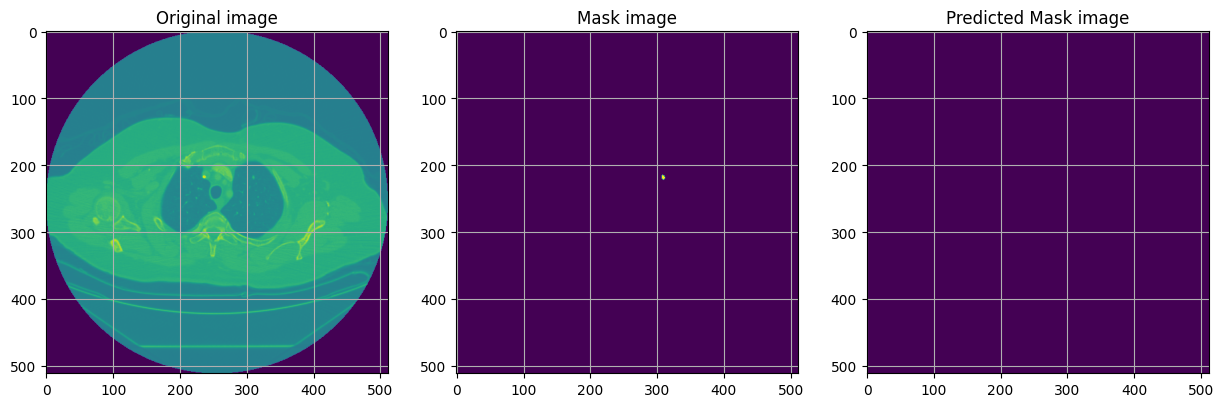

LIDC-IDRI-0020 0020_PD001_slice003.npy


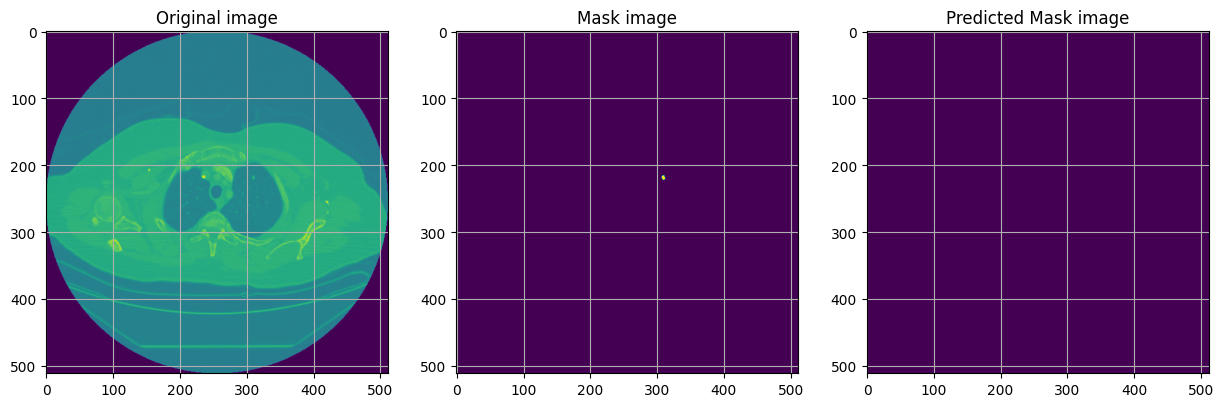

LIDC-IDRI-0020 0020_PD001_slice004.npy


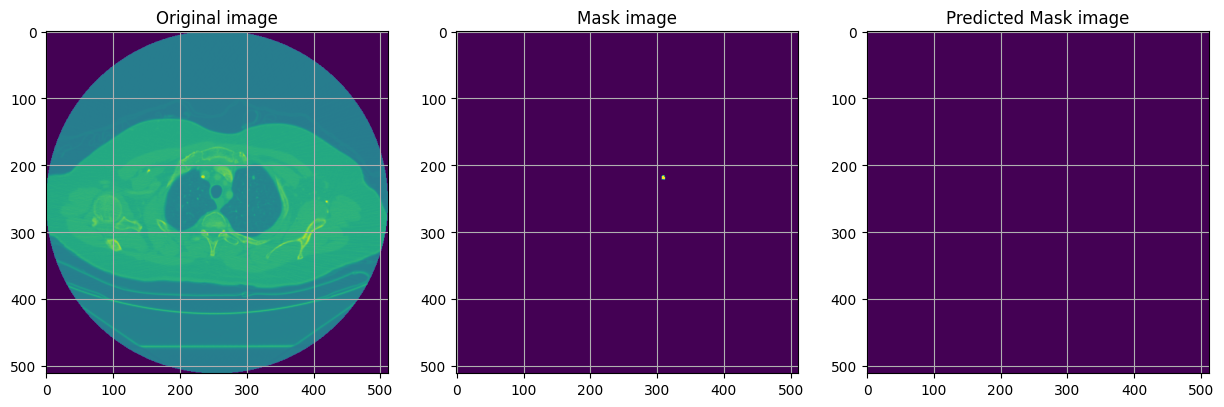

LIDC-IDRI-0020 0020_PD001_slice005.npy


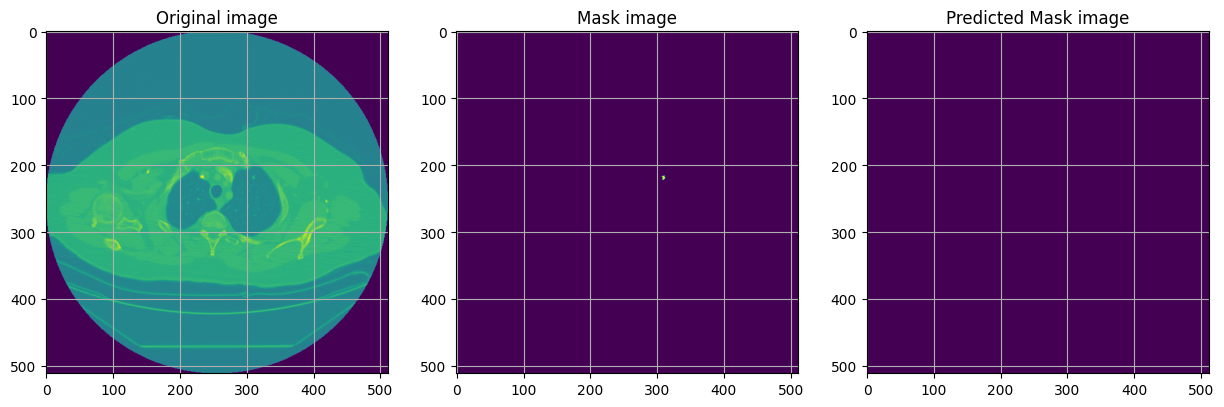

LIDC-IDRI-0020 0020_PD001_slice006.npy


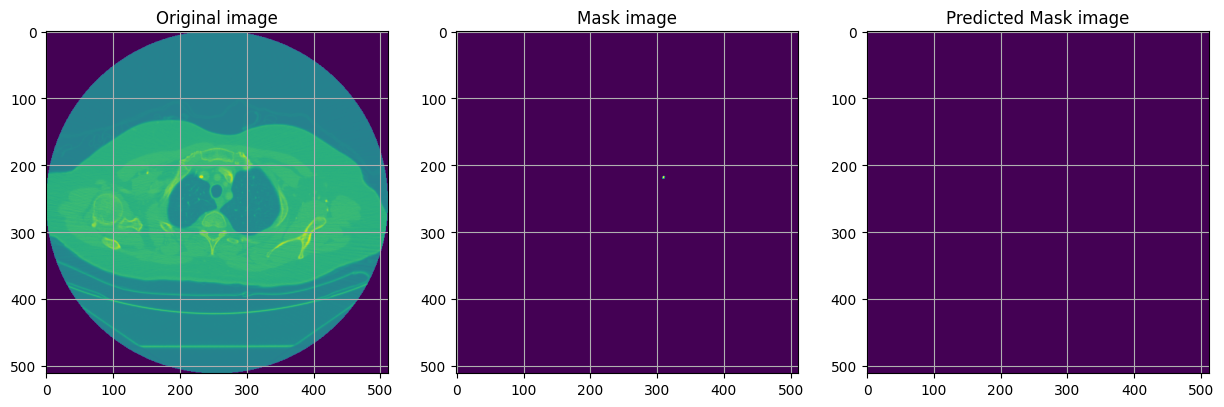

In [15]:
view_img(MASK_DIR,PREDICT_DIR,IMAGE_DIR)

In [17]:
# import the necessary packages
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import numpy as np
import argparse
import imutils
import cv2

In [18]:
def midpoint(ptA, ptB):
	return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

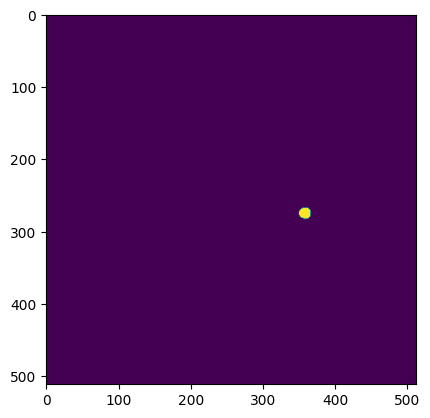

In [49]:
image = PREDICT_DIR+'\\0014_PD000_slice001.npy'
image = np.load(image)
plt.imshow(image)

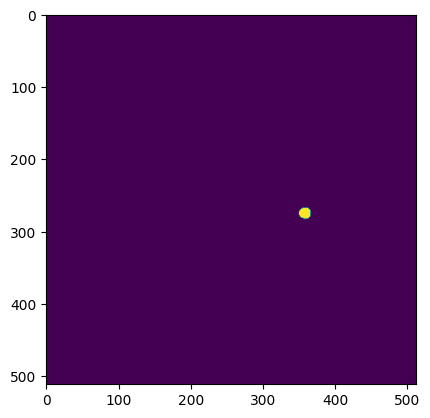

In [61]:
norm_image = cv2.normalize(image, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
norm_image = norm_image.astype(np.uint8)
plt.imshow(norm_image)

In [66]:
width = 0.9

In [44]:
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im_gray.shape

(326, 330)

In [73]:
original_dir = r'D:\Hanun\Dataset\Nodule Output\original'
cv2.imwrite(original_dir + '\\0014_PD000_slice001.png', norm_image)

True

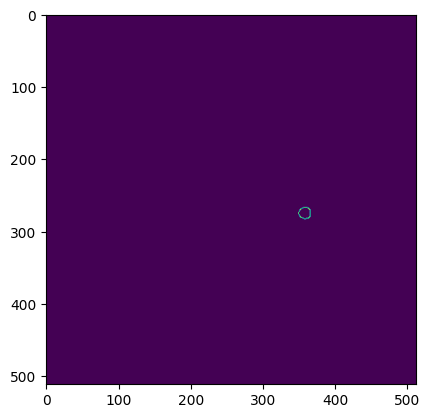

In [70]:
edged = cv2.Canny(norm_image, 50, 100)
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations=1)
plt.imshow(edged)

In [71]:
# find contours in the edge map
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
# sort the contours from left-to-right and initialize the
# 'pixels per metric' calibration variable
(cnts, _) = contours.sort_contours(cnts)
pixelsPerMetric = None

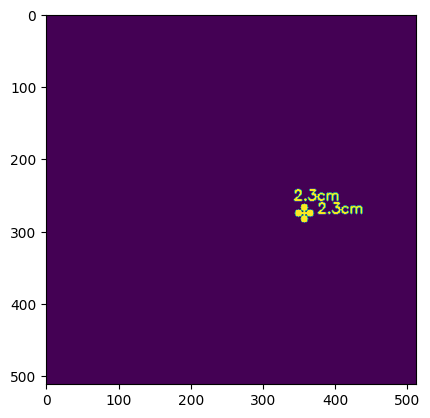

In [78]:
# loop over the contours individually
for c in cnts:
	# if the contour is not sufficiently large, ignore it
	if cv2.contourArea(c) < 100:
		continue
	# compute the rotated bounding box of the contour
	orig = image.copy()
	box = cv2.minAreaRect(c)
	box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
	box = np.array(box, dtype="int")
	# order the points in the contour such that they appear
	# in top-left, top-right, bottom-right, and bottom-left
	# order, then draw the outline of the rotated bounding
	# box
	box = perspective.order_points(box)
	cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)
	# loop over the original points and draw them
	for (x, y) in box:
		cv2.circle(orig, (int(x), int(y)), 5, (0, 0, 255), -1)
	# unpack the ordered bounding box, then compute the midpoint
	# between the top-left and top-right coordinates, followed by
	# the midpoint between bottom-left and bottom-right coordinates
	(tl, tr, br, bl) = box
	(tltrX, tltrY) = midpoint(tl, tr)
	(blbrX, blbrY) = midpoint(bl, br)
	# compute the midpoint between the top-left and top-right points,
	# followed by the midpoint between the top-righ and bottom-right
	(tlblX, tlblY) = midpoint(tl, bl)
	(trbrX, trbrY) = midpoint(tr, br)
	# draw the midpoints on the image
	cv2.circle(orig, (int(tltrX), int(tltrY)), 5, (255, 0, 0), -1)
	cv2.circle(orig, (int(blbrX), int(blbrY)), 5, (255, 0, 0), -1)
	cv2.circle(orig, (int(tlblX), int(tlblY)), 5, (255, 0, 0), -1)
	cv2.circle(orig, (int(trbrX), int(trbrY)), 5, (255, 0, 0), -1)
	# draw lines between the midpoints
	cv2.line(orig, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)),
		(255, 0, 255), 2)
	cv2.line(orig, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)),
		(255, 0, 255), 2)
	# compute the Euclidean distance between the midpoints
	dA = dist.euclidean((tltrX, tltrY), (blbrX, blbrY))
	dB = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))
	# if the pixels per metric has not been initialized, then
	# compute it as the ratio of pixels to supplied metric
	# (in this case, inches)
	if pixelsPerMetric is None:
		pixelsPerMetric = dB / width

	# compute the size of the object
	dimA = (dA / pixelsPerMetric) * 2.54
	dimB = (dB / pixelsPerMetric) * 2.54
	# draw the object sizes on the image
	cv2.putText(orig, "{:.1f}cm".format(dimA),
		(int(tltrX - 15), int(tltrY - 10)), cv2.FONT_HERSHEY_SIMPLEX,
		0.65, (255, 255, 255), 2)
	cv2.putText(orig, "{:.1f}cm".format(dimB),
		(int(trbrX + 10), int(trbrY)), cv2.FONT_HERSHEY_SIMPLEX,
		0.65, (255, 255, 255), 2)

    # save image
	count_dir = r'D:\Hanun\Dataset\Nodule Output\size count'
	cv2.imwrite(count_dir + '\\0014_PD000_slice001.png', orig)

	# show the output image
	plt.imshow(orig)

In [46]:
a.value_counts()

0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99  100  101  102  103  104  105  106  107  108  109  110  111  112  113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  128  129  130  131  132  133  134  135  136  137  138  139  140  141  142  143  144  145  146  147  148  149  150  151  152  153  154  155  156  157  158  159  160  161  162  163  164  165  166  167  168  169  170  171  172  173  174  175  176  177  178  179  180  181  182  183  184  185  186  187  188  189  190  191  192  193  194  195  196  197  198  199  200  201  202  203  204  205  206  207  208  209  210  211  212  213  214  215  216  217  218  219  

In [47]:
a

0    1    2    3    4    5    6    7    8    9    ...  320  321  322  \
0     30   30   30   30   30   30   30   30   30   30  ...   30   30   30   
1     30   30   30   30   30   30   30   30   30   30  ...   30   30   30   
2     30   30   30   30   30   30   30   30   30   30  ...   30   30   30   
3     30   30   30   30   30   30   30   30   30   30  ...   30   30   30   
4     30   30   30   30   30   30   30   30   30   30  ...   30   30   30   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
321   30   30   30   30   30   30   30   30   30   30  ...   30   30   30   
322   30   30   30   30   30   30   30   30   30   30  ...   30   30   30   
323   30   30   30   30   30   30   30   30   30   30  ...   30   30   30   
324   30   30   30   30   30   30   30   30   30   30  ...   30   30   30   
325   30   30   30   30   30   30   30   30   30   30  ...   30   30   30   

     323  324  325  326  327  328  329  
0     30   30   30   30   30   30   29  
1     30   30   30   30   30   30   29  
2     30   30   30   30   30   30   29  
3     30   30   30   30   30   30   29  
4     30   30   30   30   30   30   29  
..   ...  ...  ...  ...  ...  ...  ...  
321   30   30   30   30   30   30   29  
322   30   30   30   30   30   30   29  
323   30   30   30   30   30   30   29  
324   30   30   30   30   30   30   29  
325   30   30   30   30   30   30   29  

[326 rows x 330 columns]

In [57]:
b = pd.DataFrame(image2)

In [58]:
b.value_counts()

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99  100  101  102  103  104  105  106  107  108  109  110  111  112  113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  128  129  130  131  132  133  134  135  136  137  138  139  140  141  142  143  144  145  146  147  148  149  150  151  152  153  154  155  156  157  158  159  160  161  162  163  164  165  166  167  168  169  170  171  172  173  174  175  176  177  178  179  180  181  182  183  184  185  186  187  188  189  190  191  192  193  194  195  196  197  198  199  200  201  202  203  204  205  206  207  208  209  210  211  212  213  214  215  216  217  218  219  220  221  

In [59]:
b

0    1    2    3    4    5    6    7    8    9    ...  502  503  504  \
0      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
507    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
508    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
509    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
510    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
511    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

     505  506  507  508  509  510  511  
0      0    0    0    0    0    0    0  
1      0    0    0    0    0    0    0  
2      0    0    0    0    0    0    0  
3      0    0    0    0    0    0    0  
4      0    0    0    0    0    0    0  
..   ...  ...  ...  ...  ...  ...  ...  
507    0    0    0    0    0    0    0  
508    0    0    0    0    0    0    0  
509    0    0    0    0    0    0    0  
510    0    0    0    0    0    0    0  
511    0    0    0    0    0    0    0  

[512 rows x 512 columns]

In [54]:
image2 = image.astype(int)